#**Linear Regression**


In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.[1] This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.[2]

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.[3] Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications.[4] This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

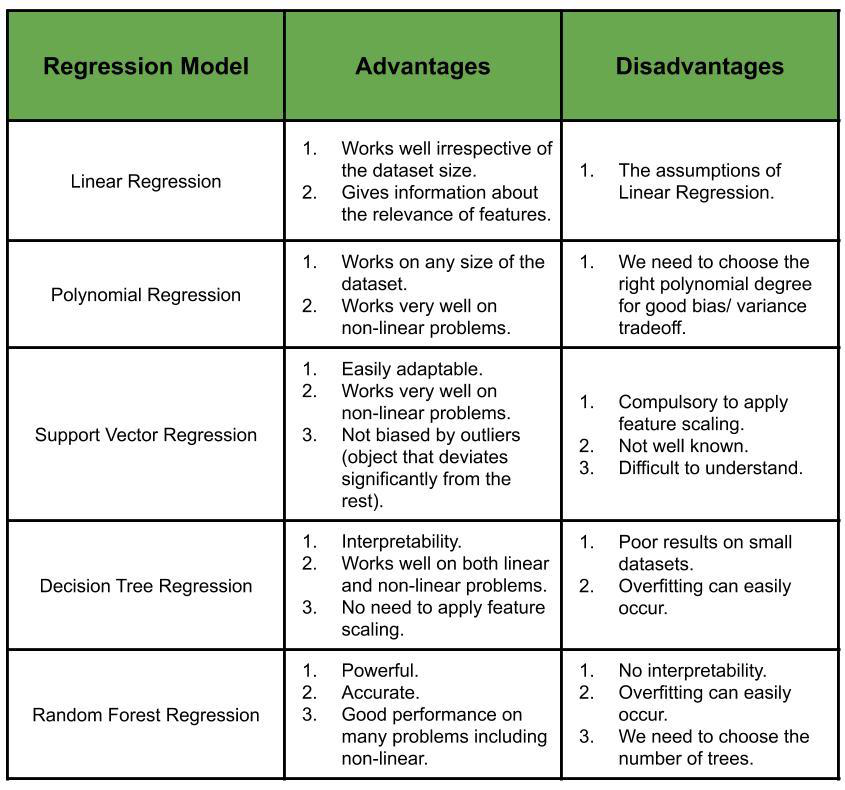


*Note: Here, we refer dependent variables as **'response'** and independent variables as **'features'** for simplicity.*


**Further Reading :-**

https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

##**Using Normal Eqn** 

It is not always necessary to run an optimization algorithm to perform linear regression. You can solve a specific algebraic equation — the normal equation — to get the results directly. Although for big datasets it is not even close to being computationally optimal, it‘s still one of the options good to be aware of.

Linear regression is one of the most important and popular predictive techniques in data analysis. It’s also one of the oldest - famous C.F. Gauss at the beginning of 19th-century was using it in the astronomy for calculation of orbits (more).
Its objective is to fit the best line (or a hyper-/plane) to the set of given points (observations) by calculating regression function parameters that minimize specific cost function (error), e.g. mean squared error (MSE).
As a reminder, below there is a linear regression equation in the expanded form.
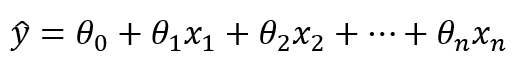

In a vectorized form it looks like that:

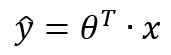

where θ is a vector of parameters weights.
Usually finding the best model parameters is performed by running some kind of optimization algorithm (e.g. gradient descent) to minimize a cost function. However, it is possible to obtain values (weights) of these parameters by solving an algebraic equation called the normal equation as well. It is defined as below.

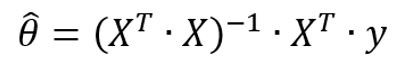

* The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3)

* *The Normal Equation gets very slow when the number of features grows large (e.g., 100,000)*

* On the positive side, this equation is linear with regards to the number of instances in the training set (it is
O(m)), so it handles large training sets efficiently, provided they can fit in memory.
* Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much
time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d quantbruce/real-estate-price-prediction

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

data=pd.read_csv('Real estate.csv')
data

  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 1.53MB/s]
Archive:  real-estate-price-prediction.zip
replace Real estate.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Real estate.csv         


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
x = data.iloc[:,1:-1] # read first two columns into X
y = data.iloc[:,-1] # read the third column into y
m = len(y) # no. of training samples
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
#adding ones to X
one = np.ones((m,1))
X = np.append(one, x, axis=1)

#reshape Y to a column vector
y = np.array(y).reshape((m,1))
X

array([[1.0000000e+00, 2.0129170e+03, 3.2000000e+01, ..., 1.0000000e+01,
        2.4982980e+01, 1.2154024e+02],
       [1.0000000e+00, 2.0129170e+03, 1.9500000e+01, ..., 9.0000000e+00,
        2.4980340e+01, 1.2153951e+02],
       [1.0000000e+00, 2.0135830e+03, 1.3300000e+01, ..., 5.0000000e+00,
        2.4987460e+01, 1.2154391e+02],
       ...,
       [1.0000000e+00, 2.0132500e+03, 1.8800000e+01, ..., 7.0000000e+00,
        2.4979230e+01, 1.2153986e+02],
       [1.0000000e+00, 2.0130000e+03, 8.1000000e+00, ..., 5.0000000e+00,
        2.4966740e+01, 1.2154067e+02],
       [1.0000000e+00, 2.0135000e+03, 6.5000000e+00, ..., 9.0000000e+00,
        2.4974330e+01, 1.2154310e+02]])

To do this we have two approaches:
* **Gradient Descent**
* **Normal Equation**


##**Gradient Descent**
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide
range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to
minimize a cost function.
Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your
feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the
steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error
function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once
the gradient is zero, you have reached a minimum!
Concretely, you start by filling θ with random values (this is called random initialization), and then you
improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function
(e.g., the MSE), until the algorithm converges to a minimum.

* ***If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time***
* ***On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution***

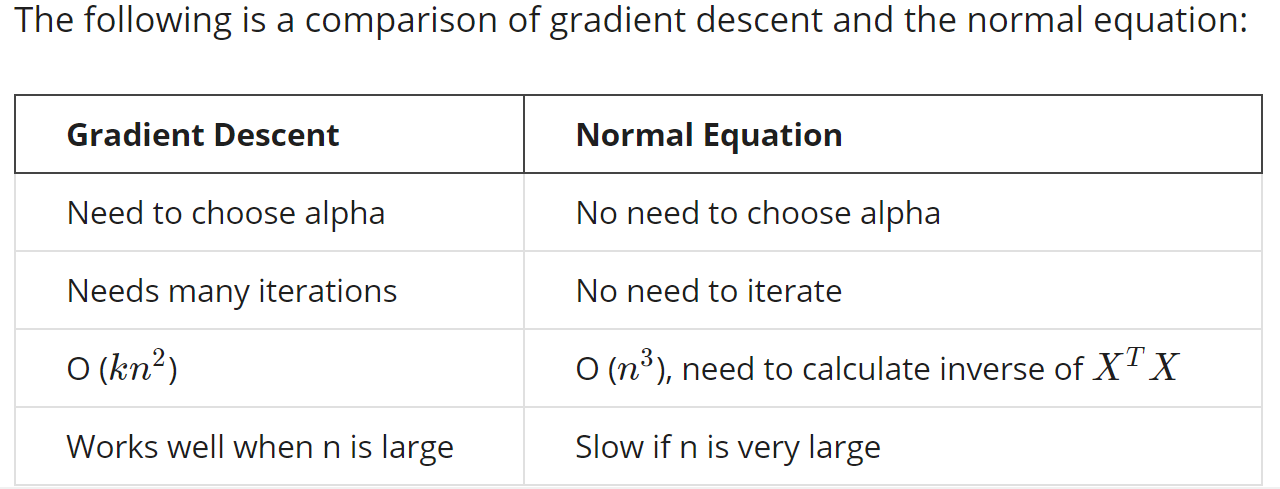

In the Normal equation method, the optimum beta is given as:

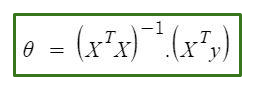

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all
sorts of irregular terrains, making convergence to the minimum very difficult. 

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In [ ]:
def normal_equation(X, Y):
  beta = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))
  return beta

normal_equation(X,y)

array([[-1.44371025e+04],
       [ 5.14622771e+00],
       [-2.69695447e-01],
       [-4.48746098e-03],
       [ 1.13327691e+00],
       [ 2.25472975e+02],
       [-1.24235912e+01]])

##**Using Numpy**

###**1-Simple**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/KaggleA

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d tanuprabhu/linear-regression-dataset

#unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zip

linear-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Linear Regression - Sheet1.csv')

data

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [ ]:
# Train Test Split

x_train=data.iloc[0:200,0]
x_test=data.iloc[201:300,0]

y_train=data.iloc[0:200,-1]
y_test=data.iloc[201:300,-1]

x_train

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: X, Length: 200, dtype: int64

In [ ]:
X_train=np.vstack([np.ones(200,dtype=int),x_train])
X_test=np.vstack([np.ones(99,dtype=int),x_test])

X_test.shape

(2, 99)

In [ ]:
theta=np.zeros([2,1],dtype=int)

theta

array([[0],
       [0]])

In [ ]:
def cost(X,y,theta):
  pred=0
  err=0
  tot=0
  m = X.shape[1]
  pred= np.dot(X.T,theta)
  for i in range(m):
    tot=+(pred[i]-y[i])**2 
  J=np.sum(tot)/(2*m)
  return J

cost(X_train,y_train,theta)

46.61854941306172

**Gradient Descent**

Gradient Descent runs iteratively to find the optimal values of the parameters corresponding to the minimum value of the given cost function, using calculus. Mathematically, the technique of the ‘derivative’ is extremely important to minimise the cost function because it helps get the minimum point. The derivative is a concept from calculus and refers to the slope of the function at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values in order to get a lower cost on the next iteration.

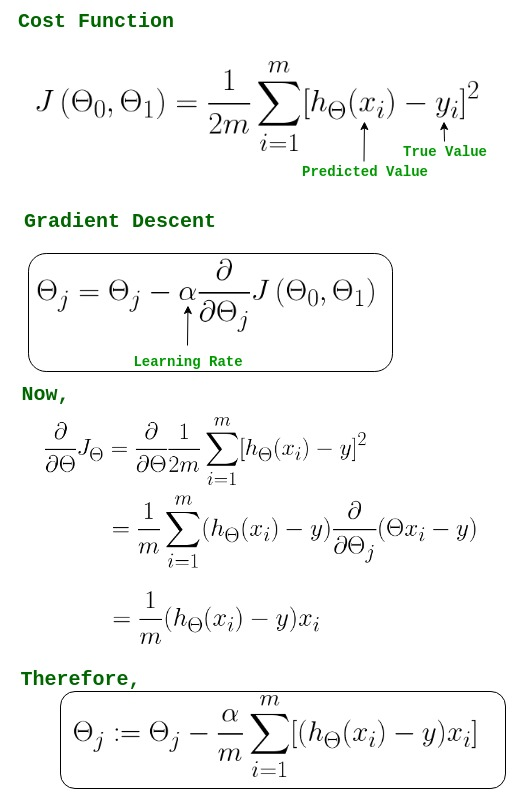

In [ ]:
iter=20
lr=0.000001

def grad_desc(X,y,theta,iter,lr):
  pred=0
  err=0
  tot=0
  m = X.shape[0]
  for a in range(iter):
    pred= np.dot(X.T,theta)
    for i in range(m):
      tot=+(pred[i]-y[i])**2
      J=np.sum(tot)/(2*m)

      err=np.dot(theta.T,X)-y[i]
      theta=theta-(lr/m)*np.dot(X,err.T)
      
      print(f'Iteration {a} :: Cost {J}.')
  return theta

grad_desc(X_train,y_train,theta,iter,lr)

Iteration 0 :: Cost 3.7808641977469133.
Iteration 0 :: Cost 5.188271605950617.
Iteration 1 :: Cost 3.7173326665593596.
Iteration 1 :: Cost 5.040886247831566.
Iteration 2 :: Cost 3.709521945080962.
Iteration 2 :: Cost 5.0232355324512765.
Iteration 3 :: Cost 3.708248115445416.
Iteration 3 :: Cost 5.020747989187669.
Iteration 4 :: Cost 3.7077447668305923.
Iteration 4 :: Cost 5.020046852006316.
Iteration 5 :: Cost 3.7073323144046255.
Iteration 5 :: Cost 5.019556407862696.
Iteration 6 :: Cost 3.706930618263188.
Iteration 6 :: Cost 5.019090850531661.
Iteration 7 :: Cost 3.7065302272352687.
Iteration 7 :: Cost 5.018628267236522.
Iteration 8 :: Cost 3.7061300266993746.
Iteration 8 :: Cost 5.018166073685814.
Iteration 9 :: Cost 3.7057298851994966.
Iteration 9 :: Cost 5.017703965096286.
Iteration 10 :: Cost 3.70532978722873.
Iteration 10 :: Cost 5.017241905519398.
Iteration 11 :: Cost 3.704929730954572.
Iteration 11 :: Cost 5.016779890711747.
Iteration 12 :: Cost 3.7045297161572015.
Iteration 12

array([[0.00446263],
       [0.03665751]])

###**2-Multiple**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 143kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Text(0.5, 1.0, 'Distribution of Final Grades')

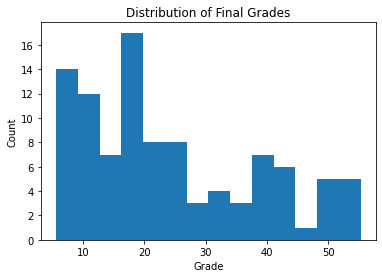

In [ ]:
# Histogram of grades
plt.hist(data['Marks'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

In [ ]:
# Train Test Split

x_train=np.array(data.iloc[0:75,0:2]).reshape(75,2)
x_test=np.array(data.iloc[76:100,0:2]).reshape(24,2)

y_train=np.array(data.iloc[0:75,-1]).reshape(75,1)
y_test=np.array(data.iloc[76:100,-1]).reshape(24,1)

m = len(y_train) # no. of training samples
M = len(y_test) # no. of training samples
y_test.shape

(24, 1)

In [ ]:
X_train = np.hstack((np.ones((75,1)), x_train))
X_test = np.hstack((np.ones((24,1)), x_test))
X_test.shape

(24, 3)

In [ ]:
theta=np.zeros([3,1], dtype=int)

theta

array([[0],
       [0],
       [0]])

In [ ]:
# Computing the cost
def compute_cost(X, y, theta):
  predictions = X @ theta
  for i in range(m):
    errors = np.subtract(predictions[i], y[i])
  J = 1/(2 * m) * errors.T.dot(errors)
  return J

compute_cost(X_train,y_train,theta)

10.641082026666666

**Gradient Descent**

Gradient Descent runs iteratively to find the optimal values of the parameters corresponding to the minimum value of the given cost function, using calculus. Mathematically, the technique of the ‘derivative’ is extremely important to minimise the cost function because it helps get the minimum point. The derivative is a concept from calculus and refers to the slope of the function at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values in order to get a lower cost on the next iteration.

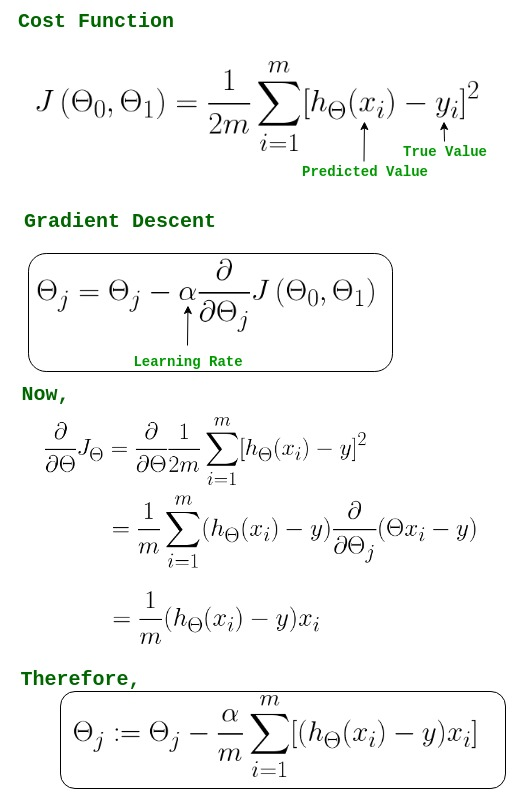

In [ ]:
# Gradient Descent Optimizer

iter=50
lr=0.04

def grad_desc(X,y,theta,iter,lr):
  for a in range(iter):
    predictions = np.dot(X,theta)
    error = np.subtract(predictions, y)
    se=np.sum(np.square(error))
    theta=np.subtract(theta,(np.multiply((lr/m),np.dot(X.T,error))))
    print(f' Iteration {a} :: Cost {np.divide(se,2*m)}')
  return theta

grad_desc(X_train,y_train,theta,iter,lr)  

 Iteration 0 :: Cost 384.67291692666663
 Iteration 1 :: Cost 326.6030902575897
 Iteration 2 :: Cost 277.79700687358576
 Iteration 3 :: Cost 236.7056933981091
 Iteration 4 :: Cost 202.056967799591
 Iteration 5 :: Cost 172.8016982345863
 Iteration 6 :: Cost 148.07146006289332
 Iteration 7 :: Cost 127.14497377059541
 Iteration 8 :: Cost 109.42134542180094
 Iteration 9 :: Cost 94.39860754744373
 Iteration 10 :: Cost 81.65641454619971
 Iteration 11 :: Cost 70.84201392519881
 Iteration 12 :: Cost 61.658816000699325
 Iteration 13 :: Cost 53.85703691732928
 Iteration 14 :: Cost 47.22600549967469
 Iteration 15 :: Cost 41.587812736989704
 Iteration 16 :: Cost 36.79205044348411
 Iteration 17 :: Cost 32.711437895999424
 Iteration 18 :: Cost 29.238175794489592
 Iteration 19 :: Cost 26.28089852864628
 Iteration 20 :: Cost 23.762120569366594
 Iteration 21 :: Cost 21.616092416087756
 Iteration 22 :: Cost 19.786997111206716
 Iteration 23 :: Cost 18.227430782530934
 Iteration 24 :: Cost 16.8971206797781

array([[-1.14393212],
       [ 0.99555007],
       [ 4.97135687]])

In [ ]:
# Predicting on Test Set

y_pred=np.dot(X_test,theta)
y_pred.shape

(24, 1)

In [ ]:
# Scoring the accuracy of the Predictions

def rmse(pred,test):
  error=np.subtract(pred,test)
  se=np.sum(np.square(error))
  rmse=(se**0.5)/m
  return f'RMSE : {rmse}'

rmse(y_pred,y_test)

'RMSE : 1.9866902212921314'

###**3-Lasso**

* Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 158kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Text(0.5, 1.0, 'Distribution of Final Grades')

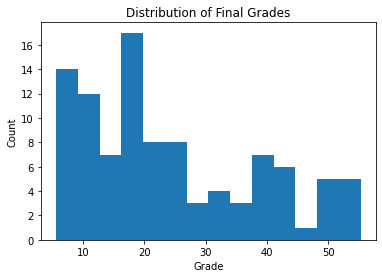

In [ ]:
# Histogram of grades
plt.hist(data['Marks'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

In [ ]:
# Train Test Split

x_train=np.array(data.iloc[0:75,0:2]).reshape(75,2)
x_test=np.array(data.iloc[76:100,0:2]).reshape(24,2)

y_train=np.array(data.iloc[0:75,-1]).reshape(75,1)
y_test=np.array(data.iloc[76:100,-1]).reshape(24,1)

m = len(y_train) # no. of training samples
M = len(y_test) # no. of training samples
x_train.shape

(75, 2)

In [ ]:
X_train = np.hstack((np.ones((75,1)), x_train))
X_test = np.hstack((np.ones((24,1)), x_test))
X_train.shape

(75, 3)

In [ ]:
theta=np.zeros([3,1], dtype=int)

theta

array([[0],
       [0],
       [0]])

In [ ]:
# Computing the cost
def compute_cost(X, y, theta):
  predictions = X @ theta
  for i in range(m):
    errors = np.subtract(predictions[i], y[i])
  J = 1/(2 * m) * errors.T.dot(errors)
  return J

compute_cost(X_train,y_train,theta)

10.641082026666666


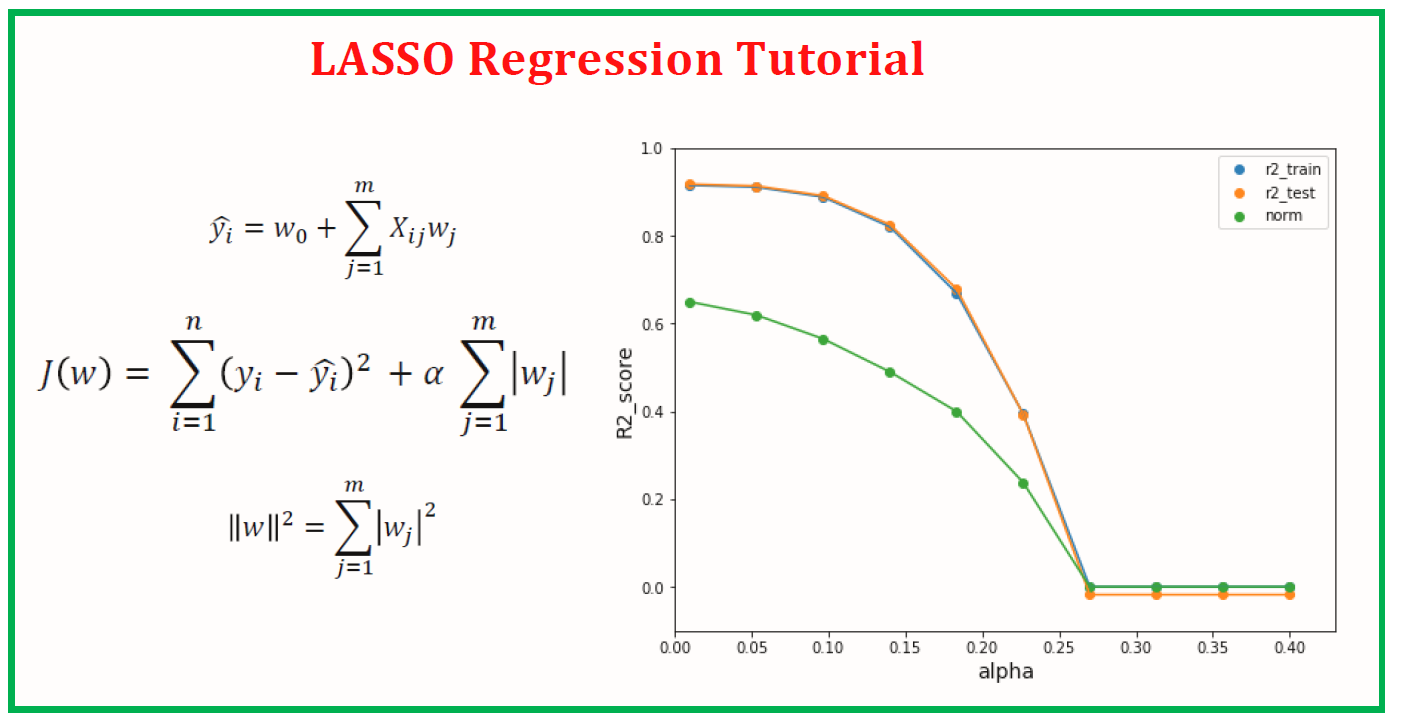

In [ ]:
# Lasso Reggresion Gradient Descent Optimizer

def grad_desc(X,y,theta,iter,lr,alpha):
  for a in range(iter):
    predictions = np.dot(X,theta)
    error = np.subtract(predictions, y)
    se=np.sum(np.square(error))
    for i in range(len(theta)):
      if theta[i]<0:
        theta=np.subtract(theta,(np.multiply((lr/m),np.dot(X.T,error)))) + alpha * np.sum(np.abs(theta))
      else:
        theta=np.subtract(theta,(np.multiply((lr/m),np.dot(X.T,error)))) - alpha * np.sum(np.abs(theta))
    print(f' Iteration {a} :: Cost {np.divide(se,2*m)}')
  return theta

grad_desc(X_train,y_train,theta,iter=50,lr=0.01,alpha=0.01) 

 Iteration 0 :: Cost 384.67291692666663
 Iteration 1 :: Cost 84.52537162592829
 Iteration 2 :: Cost 46.56784788839088
 Iteration 3 :: Cost 20.719035254577093
 Iteration 4 :: Cost 20.562760294691888
 Iteration 5 :: Cost 15.873336109348338
 Iteration 6 :: Cost 14.79002039646206
 Iteration 7 :: Cost 13.414441837772136
 Iteration 8 :: Cost 12.659786138749325
 Iteration 9 :: Cost 11.918616872749896
 Iteration 10 :: Cost 11.380836770251033
 Iteration 11 :: Cost 10.915900054921025
 Iteration 12 :: Cost 10.5473282062514
 Iteration 13 :: Cost 10.23825788712796
 Iteration 14 :: Cost 9.984032857462937
 Iteration 15 :: Cost 9.770137578067498
 Iteration 16 :: Cost 9.589824913035537
 Iteration 17 :: Cost 9.435638909920346
 Iteration 18 :: Cost 9.302586912578885
 Iteration 19 :: Cost 9.186298386467794
 Iteration 20 :: Cost 9.08348281041667
 Iteration 21 :: Cost 8.991448711152136
 Iteration 22 :: Cost 8.908093603905032
 Iteration 23 :: Cost 8.831732637321803
 Iteration 24 :: Cost 8.76103452354585
 Ite

array([[-4.10948363],
       [ 1.43256806],
       [ 5.01849608]])

###**4-Ridge**

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

* Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of square of coefficients)

***It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using
precision/recall.***


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 111kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Text(0.5, 1.0, 'Distribution of Final Grades')

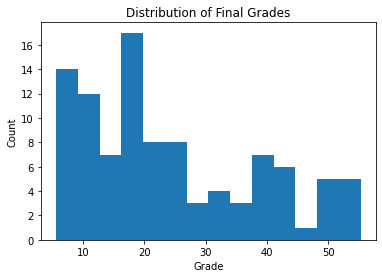

In [ ]:
# Histogram of grades
plt.hist(data['Marks'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

In [ ]:
# Train Test Split

x_train=np.array(data.iloc[0:75,0:2]).reshape(75,2)
x_test=np.array(data.iloc[76:100,0:2]).reshape(24,2)

y_train=np.array(data.iloc[0:75,-1]).reshape(75,1)
y_test=np.array(data.iloc[76:100,-1]).reshape(24,1)

m = len(y_train) # no. of training samples
M = len(y_test) # no. of training samples
x_train.shape

(75, 2)

In [ ]:
X_train = np.hstack((np.ones((75,1)), x_train))
X_test = np.hstack((np.ones((24,1)), x_test))
X_train.shape

(75, 3)

In [ ]:
theta=np.zeros([3,1], dtype=int)

theta

array([[0],
       [0],
       [0]])

In [ ]:
# Computing the cost
def compute_cost(X, y, theta):
  predictions = X @ theta
  for i in range(m):
    errors = np.subtract(predictions[i], y[i])
  J = 1/(2 * m) * errors.T.dot(errors)
  return J

compute_cost(X_train,y_train,theta)

10.641082026666666

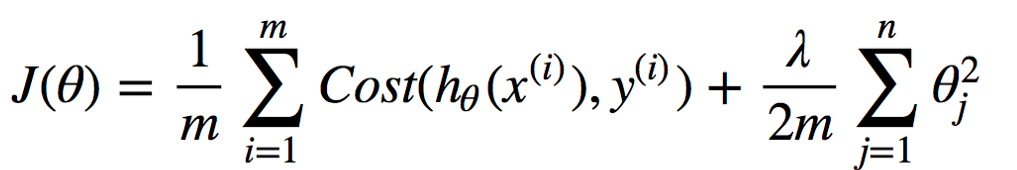

In [ ]:
# Ridge Reggresion Gradient Descent Optimizer

def grad_desc(X,y,theta,iter,lr,alpha):
  for a in range(iter):
    predictions = np.dot(X,theta)
    error = np.subtract(predictions, y)
    se=np.sum(np.square(error))
    theta=np.subtract(theta,(np.multiply((lr/m),np.dot(X.T,error)))) - (alpha/(2*m) * np.sum(np.square(theta)))
    print(f' Iteration {a} :: Cost {np.divide(se,2*m)}')
  return theta

grad_desc(X_train,y_train,theta,iter=50,lr=0.04,alpha=0.5) 

 Iteration 0 :: Cost 384.67291692666663
 Iteration 1 :: Cost 326.6030902575897
 Iteration 2 :: Cost 323.83779613511473
 Iteration 3 :: Cost 275.16412077731104
 Iteration 4 :: Cost 275.2351754473799
 Iteration 5 :: Cost 233.0232063721665
 Iteration 6 :: Cost 235.36930253596677
 Iteration 7 :: Cost 198.05743945719792
 Iteration 8 :: Cost 202.11038402729847
 Iteration 9 :: Cost 168.78397845332384
 Iteration 10 :: Cost 174.07079183698306
 Iteration 11 :: Cost 144.12363270183258
 Iteration 12 :: Cost 150.2815313797178
 Iteration 13 :: Cost 123.26098048724953
 Iteration 14 :: Cost 130.02248523287224
 Iteration 15 :: Cost 105.56004460131733
 Iteration 16 :: Cost 112.73154273915998
 Iteration 17 :: Cost 90.51214573281496
 Iteration 18 :: Cost 97.95435342079786
 Iteration 19 :: Cost 77.70259290004674
 Iteration 20 :: Cost 85.31517645255511
 Iteration 21 :: Cost 66.78858116853566
 Iteration 22 :: Cost 74.4988621923319
 Iteration 23 :: Cost 57.483909360345535
 Iteration 24 :: Cost 65.238872383921

array([[-5.57943607],
       [ 1.22304381],
       [ 4.72431808]])

##**Using Sklearn**

###**1-Simple**

Simple linear regression is an approach for predicting a response using a single feature.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/KaggleA

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/My Drive/KaggleA'
/content


In [ ]:
!kaggle datasets download -d tanuprabhu/linear-regression-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

linear-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  linear-regression-dataset.zip
  inflating: Linear Regression - Sheet1.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Linear Regression - Sheet1.csv')

df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


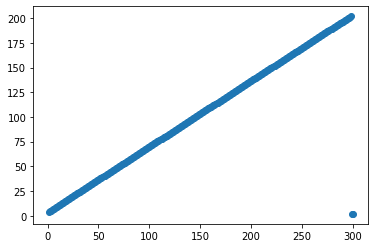

In [ ]:
plt.scatter(df["X"], df["Y"])

In [ ]:
# On the plot above we can see come outliers at the right corner
# We should remove them to improve the accuracy of our model
# As we can see, rows 298 and 299 have really small values compered to the previous ones
print(df.tail())
df.drop([298, 299], inplace=True)

X = df["X"].to_numpy().reshape(-1, 1)
y = df["Y"].to_numpy().reshape(-1, 1)

       X           Y
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889


In [ ]:
# Split data into Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(f"Size of Train set: {X_train.shape[0]}")
print(f"Size of Test set: {X_test.shape[0]}")

Size of Train set: 199
Size of Test set: 99


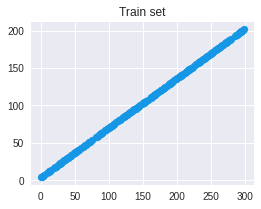

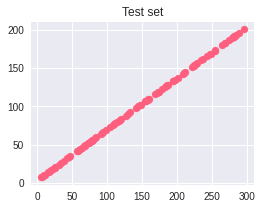

In [ ]:
# Print our Train and Test sets

plt.style.use("seaborn")
plt.figure(figsize=(4,3))
plt.title("Train set")
plt.scatter(X_train, y_train, c="#1597E5")

plt.figure(figsize=(4,3))
plt.title("Test set")
plt.scatter(X_test, y_test, c="#FF5F7E")

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

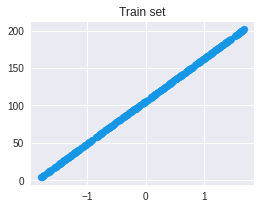

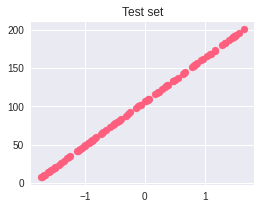

In [ ]:
# Print Standardized sets

plt.figure(figsize=(4,3))
plt.title("Train set")
plt.scatter(X_train, y_train, c="#1597E5")

plt.figure(figsize=(4,3))
plt.title("Test set")
plt.scatter(X_test, y_test, c="#FF5F7E")

In [ ]:
# Train our model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Evaluate our model

print(f"R2 Score for Test set: ", r2_score(y_test, y_pred_test))
print(f"MSE for Test set: ", mean_squared_error(y_test, y_pred_test))

print(f"R2 Score for Train set: ", r2_score(y_train, y_pred_train))
print(f"MSE for Train set: ", mean_squared_error(y_train, y_pred_train))

R2 Score for Test set:  1.0
MSE for Test set:  3.8084141535249706e-16
R2 Score for Train set:  1.0
MSE for Train set:  3.9536008609740074e-16


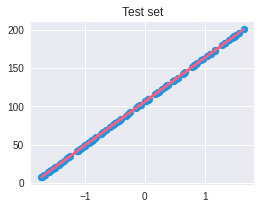

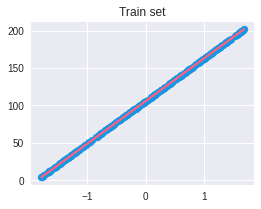

In [ ]:
# Plot out predictions

plt.figure(figsize=(4,3))
plt.title("Test set")
plt.scatter(X_test, y_test, c="#1597E5")
plt.plot(X_test, y_pred_test, c="#FF5F7E")

plt.figure(figsize=(4,3))
plt.title("Train set")
plt.scatter(X_train, y_train, c="#1597E5")
plt.plot(X_train, y_pred_train, c="#FF5F7E")

###**2-Multiple**

Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

Clearly, it is nothing but an extension of Simple linear regression.

Consider a dataset with p features(or independent variables) and one response(or dependent variable).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 237kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


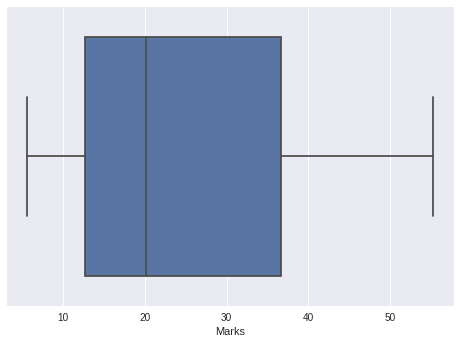

In [ ]:
sns.boxplot(x=data['Marks'])

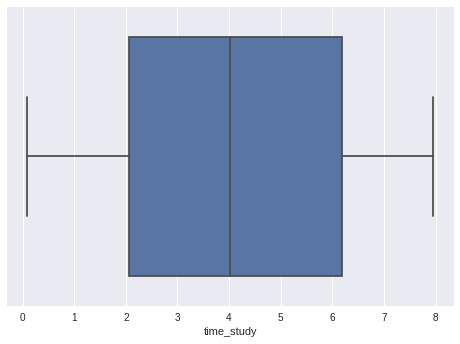

In [ ]:
sns.boxplot(x=data['time_study'])

For 3 number of courses Average Marks is : 18.433318181818183
For 4 number of courses Average Marks is : 19.02995238095238
For 6 number of courses Average Marks is : 29.863062499999998
For 8 number of courses Average Marks is : 33.835375000000006
For 7 number of courses Average Marks is : 29.401466666666668
For 5 number of courses Average Marks is : 17.641000000000002


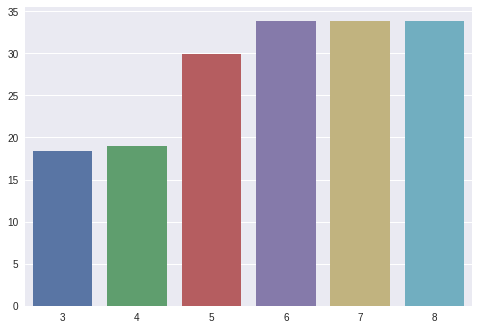

In [ ]:
course = []
marks = []
for count in data['number_courses'].value_counts().index:
    course.append(count)
    marks.append(np.mean(data[data['number_courses'] == count]['Marks']))
    print(f"For {count} number of courses Average Marks is : {np.mean(data[data['number_courses'] == count]['Marks'])}")

    sns.barplot(x=course,y=marks)

In [ ]:
# Seggregating X & Y of the Data

X = data.drop('Marks',axis=1)
y = data['Marks']


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(25,)

In [ ]:
# Standizing the Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-6.59912018e-01,  1.20079486e-01],
       [-6.59912018e-01, -1.60683856e+00],
       [-1.20983870e+00, -1.53935462e+00],
       [-1.20983870e+00,  9.21922741e-01],
       [-1.20983870e+00,  2.76424250e-01],
       [ 9.89868026e-01, -1.48821773e+00],
       [-6.59912018e-01,  3.37620860e-01],
       [ 1.53979471e+00,  9.33659077e-01],
       [-1.09985336e-01, -1.60013208e+00],
       [ 1.53979471e+00,  1.04683089e+00],
       [ 4.39941345e-01, -3.19613967e-01],
       [-6.59912018e-01,  6.28514336e-01],
       [ 4.39941345e-01, -7.67690517e-01],
       [-1.20983870e+00,  1.49616490e+00],
       [-1.09985336e-01,  7.31626432e-01],
       [-1.09985336e-01, -2.53672524e-02],
       [-1.20983870e+00,  4.58890745e-02],
       [-1.09985336e-01, -2.34944685e-01],
       [ 4.39941345e-01, -1.72909765e-01],
       [ 1.53979471e+00,  1.69539759e-01],
       [ 1.53979471e+00,  1.45865893e-03],
       [ 1.53979471e+00, -7.17391933e-01],
       [-1.20983870e+00, -1.07576934e+00],
       [ 4.

In [ ]:
# Fitting the ML Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting using Trained Model on Test Set

predictions = model.predict(X_test)
predictions

array([19.36241182, 37.91727661, 20.26510897,  9.69767542, 11.03305255,
       44.96949731, 13.42529809, 47.80210469, 37.11408538, 22.37491563,
       44.63793075, 28.48710199,  7.45960114, 38.85105813, 28.24485836,
       48.93543345, 35.84748674, 39.47542502, 28.43136455,  8.98273502,
       21.67051515, 12.14047767,  9.2108655 , 23.29333343, 25.14285315])

In [ ]:
# Evaluating

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Linear Regression")
print(f"Mean absolute error is: {mean_absolute_error(y_test,predictions)}")
print(f"Root Mean Square Error is: {mean_squared_error(y_test,predictions,squared=False)}")

Linear Regression
Mean absolute error is: 3.0719017047093073
Root Mean Square Error is: 3.6366974670991907


###**3-Polynomial**

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use
a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new
features, then train a linear model on this extended set of features. This technique is called Polynomial
Regression.
* you need to transform the array of inputs to include non-linear terms such as 𝑥².

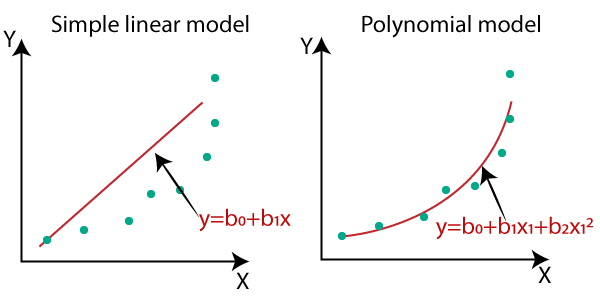

PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n+d)! / n!d! features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d bulentsiyah/polynomialregressioncsv

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/274 [00:00<?, ?B/s]
100% 274/274 [00:00<00:00, 19.4kB/s]
Archive:  polynomialregressioncsv.zip
  inflating: polynomial-regression.csv  


In [ ]:
data=pd.read_csv('polynomial-regression.csv')
data

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [ ]:
# Seggregating X & Y

X = data[['araba_fiyat']]
y = data[['araba_max_hiz']]

X

,araba_fiyat
0,60
1,70
2,80
3,100
4,120
5,150
6,200
7,250
8,300
9,400


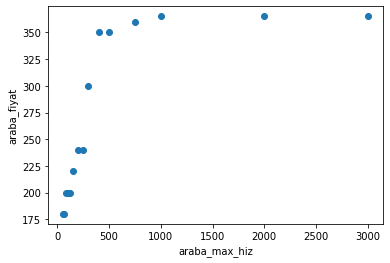

In [ ]:
# Plotting
plt.scatter(X,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

In [ ]:
# Training the polynomial linear regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# Training Linear Regression model on polynomial features as well as y
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(X_poly,y)

LinearRegression()

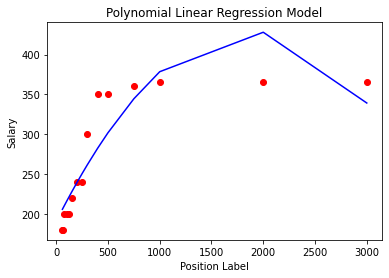

In [ ]:
# Visualizing the Polynomial linear regression result
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg1.predict(X_poly),color='blue')
plt.title('Polynomial Linear Regression Model')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Change the degree to higher value and see how it fits to the points.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

In [ ]:
# Training Linear Regression model on polynomial features as well as y
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(X_poly,y)

LinearRegression()

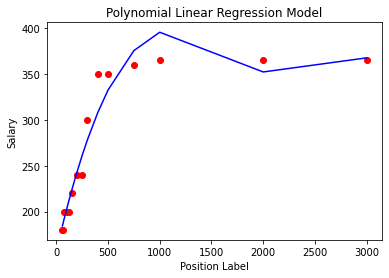

In [ ]:
# Visualizing the Polynomial linear regression result
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg1.predict(X_poly),color='blue')
plt.title('Polynomial Linear Regression Model')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

###**4-Lasso**

It is also called as l1 regularization. Similar to ridge regression, lasso regression also works in a similar fashion the only difference is of the penalty term. In ridge, we multiply it by slope and take the square whereas in lasso we just multiply the alpha with absolute of slope.

* regularization term penalizes absolute value of the coefficients
* sets irrelevant values to 0
* might remove too many features in your model

Lasso, or ***Least Absolute Shrinkage and Selection Operator***, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.


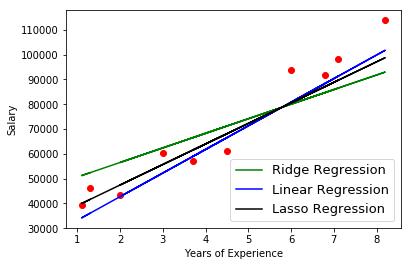


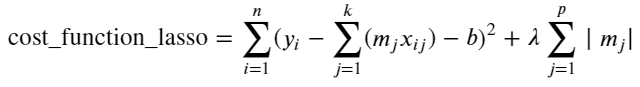

***Many people like LASSO for this reason: the coefficients can actually go to zero, whereas in the Ridge regression, they do not go to zero, they become small, but they never vanish.***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

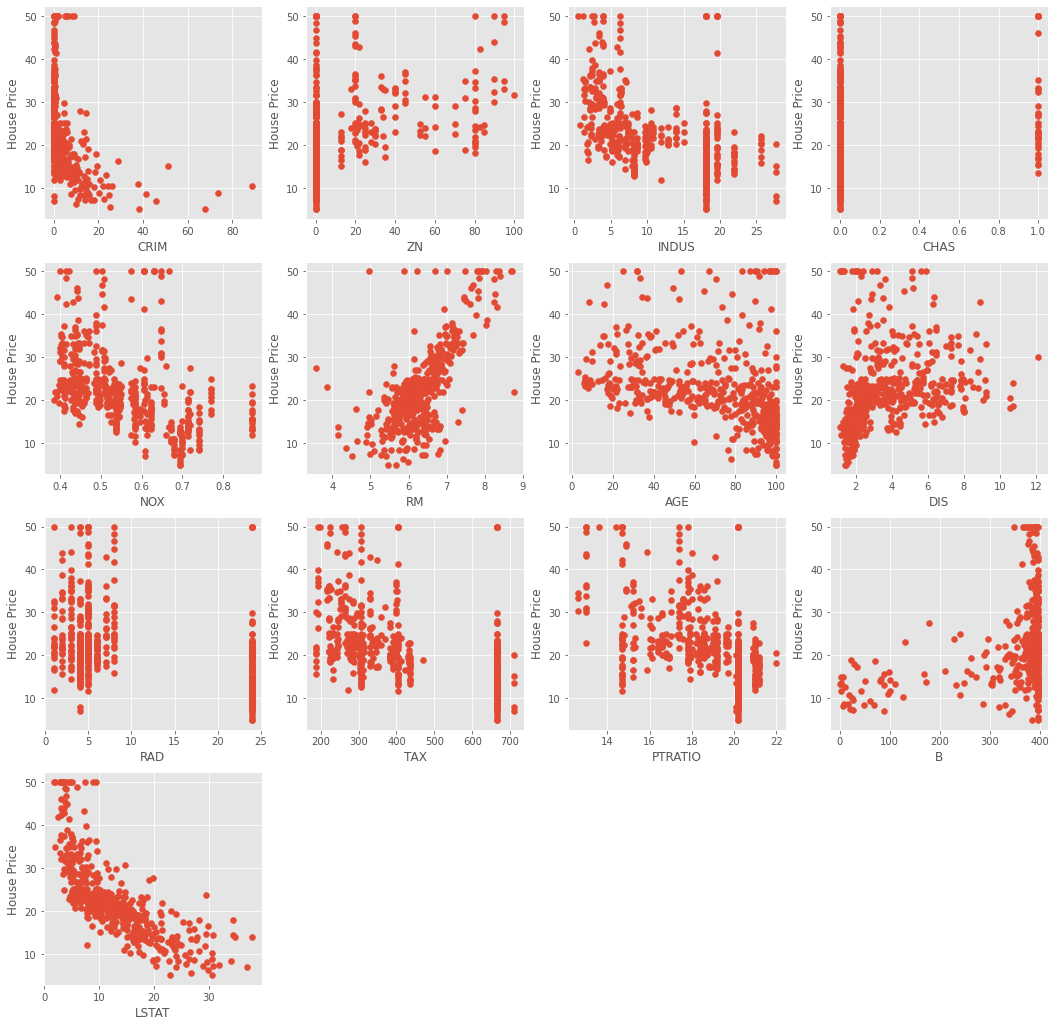

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]
#output
Y = boston_pd.iloc[:, -1]
print(boston_pd.head())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape))
print("Test data shape of X = % s and Y = % s : "%(	x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [ ]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 27.092333808033
    Columns  Coefficient Estimate
0      CRIM             -0.077685
1        ZN              0.041612
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.687736
6       AGE              0.024676
7       DIS             -0.815639
8       RAD              0.284513
9       TAX             -0.015235
10  PTRATIO             -0.624044
11        B              0.010314
12    LSTAT             -0.829167


###**5-LassoCV**

The best model is selected by cross-validation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 101kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
x=data[['number_courses','time_study']]
y=data[['Marks']]
x

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

x_train.shape
y_train.shape

(75, 1)

In [ ]:
from sklearn.linear_model import LassoCV
lcv=LassoCV(
    alphas=[0.4,0.45,0.5,0.55],
    normalize=True,
    random_state=42,
    cv=5)
lcv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(alphas=[0.4, 0.45, 0.5, 0.55], cv=5, normalize=True, random_state=42)

In [ ]:
print(lcv.coef_)

[0.24554849 3.92753007]


In [ ]:
y_pred=lcv.predict(x_test)
y_pred

array([20.66437798, 32.35679074, 22.5357682 , 15.71160683, 15.5369096 ,
       38.89015916, 16.16342852, 39.85051812, 36.49609598, 25.32227292,
       38.63879723, 24.02068602, 14.01491384, 34.25174614, 25.02409209,
       39.52264723, 33.16177868, 32.35097731, 25.16548317, 15.16960768,
       20.04005643, 15.18940106, 10.5943466 , 22.45737332, 23.85950156])

In [ ]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
r

0.7949734839844286

###**6-Ridge**

It is also called an L2 regularization that is used to get rid of overfitting. The goal while building a machine learning model is to develop a model that can generalize patterns well in training as well as in testing.

* penalizes the size (square of the magnitude) of the regression coefficients
* enforces the B (slope/partial slope) coefficients to be lower, but not 0
* does not remove irrelevant features, but minimizes their impact

A Ridge regressor is basically a regularized version of Linear Regressor. i.e to the original cost function of linear regressor we add a regularized term which forces the learning algorithm to fit the data and helps to keep the weights lower as possible. The regularized term has the parameter ‘alpha’ which controls the regularization of the model i.e helps in reducing the variance of the estimates.

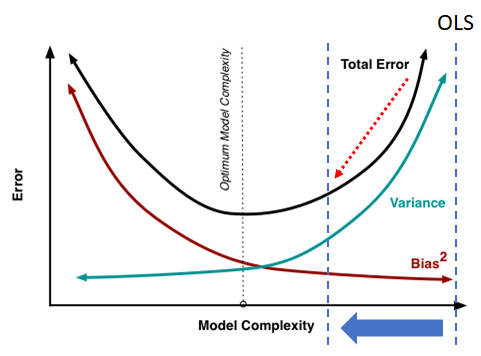

Formula :-

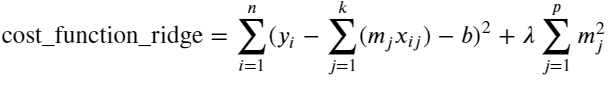

So the Ridge objective is the residual sum of squares (RSS) +lambda * (sum of squares of the coefficients).

use lambda to balance minimizing RSS vs. minimizing the coefficients
* when lambda = 0, results are the same as regular linear regression: you have removed the Ridge regression penalty
* as lambda increases to infinity, coefficients become closer to 0
any non-zero lambda value will shrink the coefficients to be smaller than with non-regularized regression
* as lambda (alpha) increases, model complexity decreases

Lambda is just a scalar that should be learned from your data using cross-validation (tuning). So lambda is always positive and is between zero and infinity. And just to give you a basic idea of its range, it is rarely much larger than one, maybe going to two or three, and often is a small fraction of one.

***It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using
precision/recall.***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

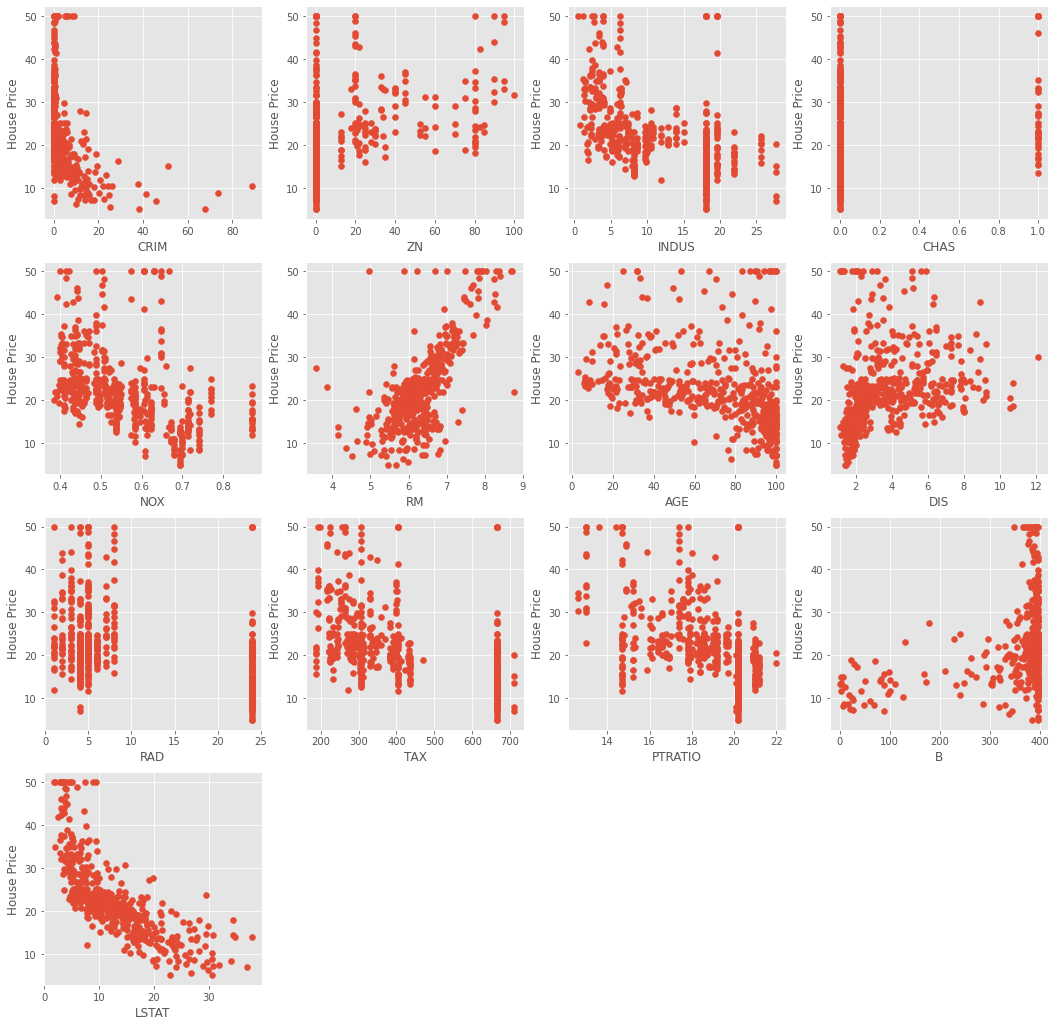

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]
#output
Y = boston_pd.iloc[:, -1]
print(boston_pd.head())

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


20.486113706116868
    Columns  Coefficient Estimate
0      CRIM             -0.111104
1        ZN              0.046795
2     INDUS             -0.016172
3      CHAS              2.002845
4       NOX             -8.796631
5        RM              3.364967
6       AGE             -0.003944
7       DIS             -1.525474
8       RAD              0.306658
9       TAX             -0.012844
10  PTRATIO             -0.804607
11        B              0.011433
12    LSTAT             -0.614105


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

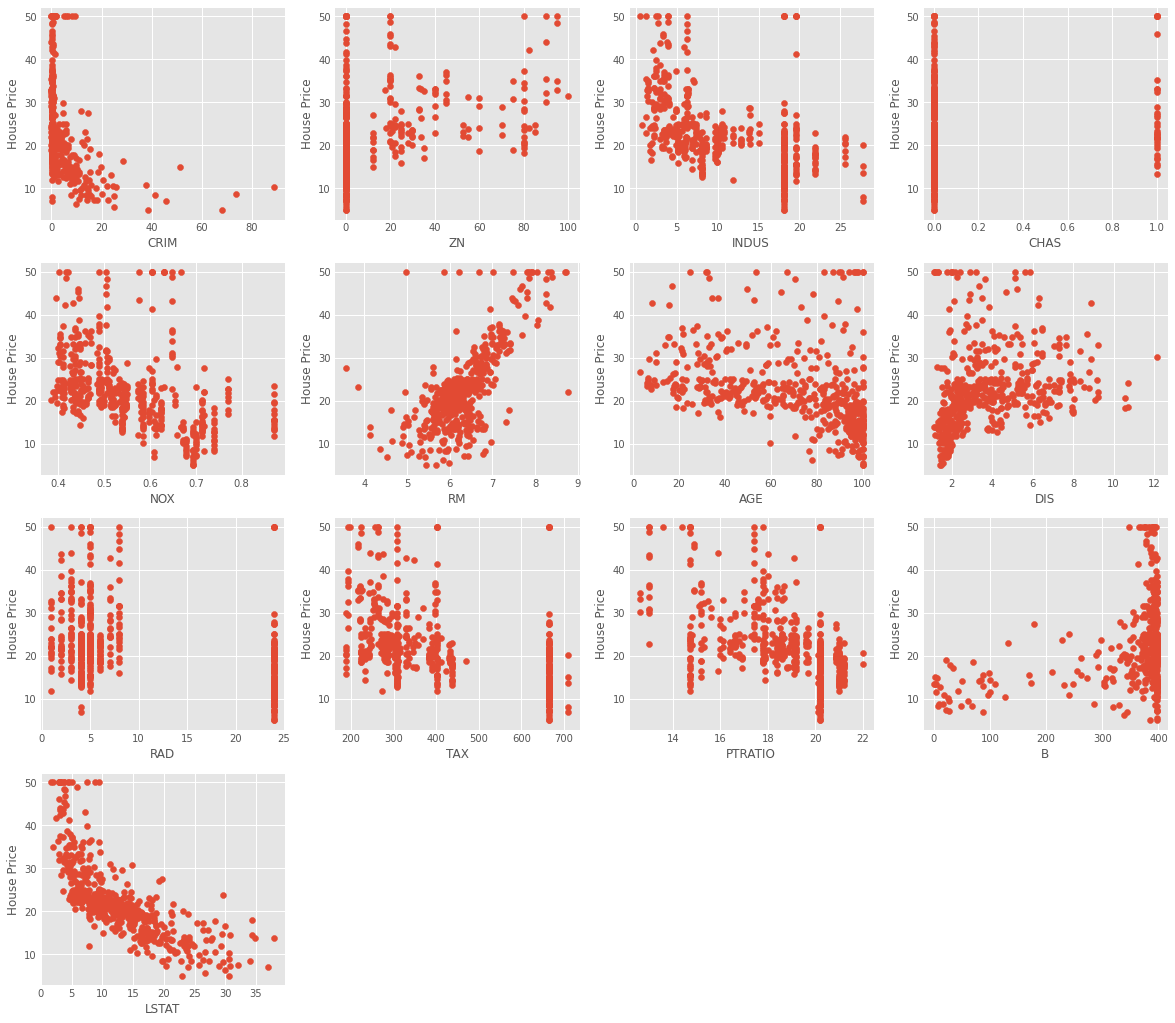

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]
Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 
21.525885846596214
    Columns  Coefficient Estimate
0      CRIM             -0.112984
1        ZN              0.041595
2     INDUS              0.023064
3      CHAS              2.493356
4       NOX             -9.821058
5        RM              4.750769
6       AGE             -0.010001
7       DIS             -1.259375
8       RAD              0.207020
9       TAX             -0.010795
10  PTRATIO             -0.908541
11        B    

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 

for index, feature_name in enumerate(boston_dataset.feature_names): 
	ax = fig.add_subplot(4, 4, index + 1) 
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
	ax.set_ylabel('House Price', size = 12) 
	ax.set_xlabel(feature_name, size = 12) 

plt.show() 

# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 
print(boston_pd.head()) 

x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1], 
	test_size = 0.25) 

print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape)) 
print("Test data shape of X = % s and Y = % s : "%(x_test.shape, y_test.shape)) 

# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

###**7-ElasticNet**

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds. 

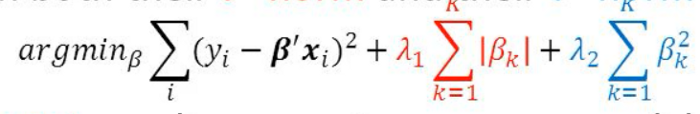

Graph :-

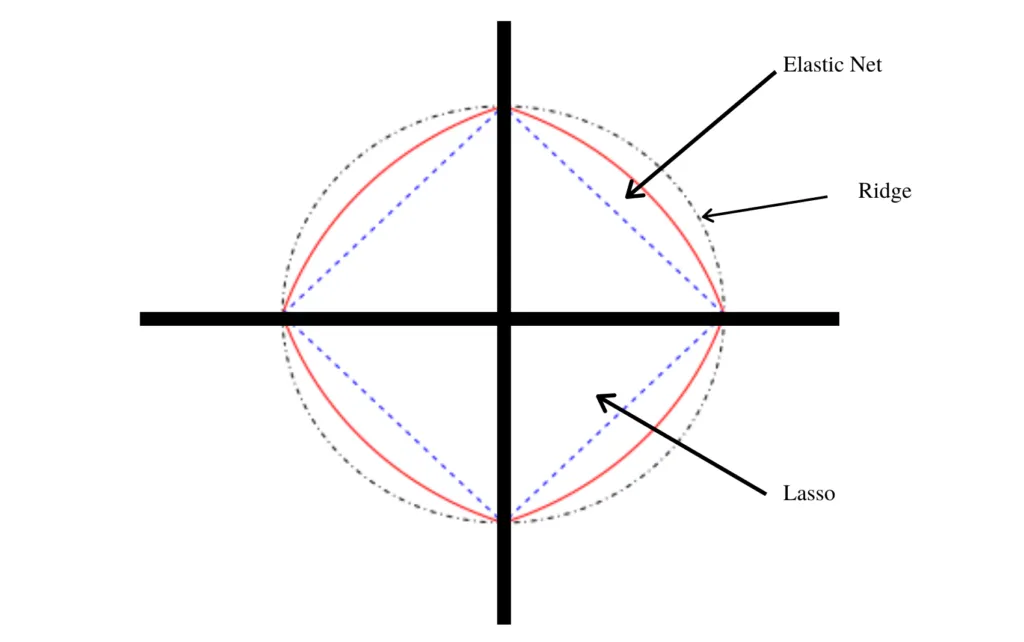

Further Read:- https://analyticsindiamag.com/hands-on-tutorial-on-elasticnet-regression/

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

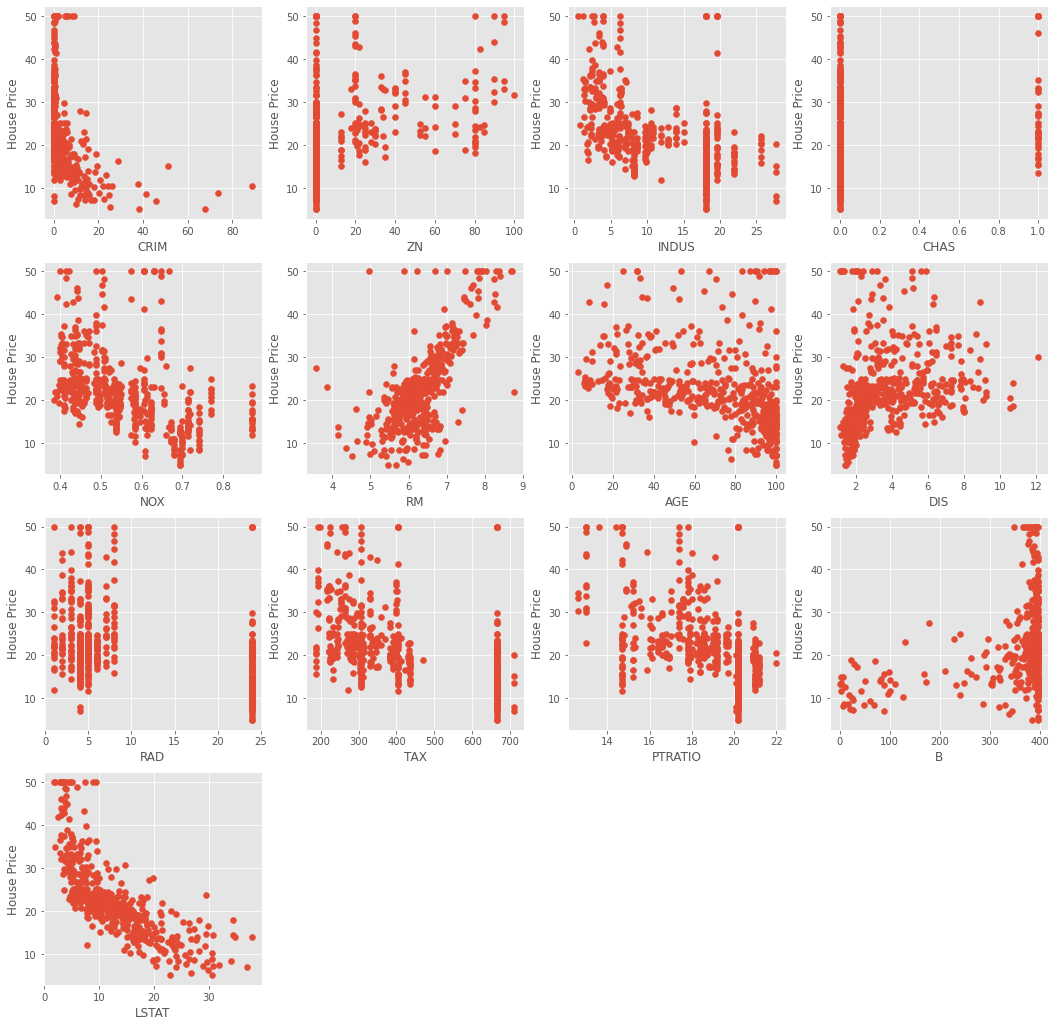

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]
#output
Y = boston_pd.iloc[:, -1]
print(boston_pd.head())

###**8-ElasticNetCV**

The best model is selected by cross-validation.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yasserh/student-marks-dataset

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/949 [00:00<?, ?B/s]
100% 949/949 [00:00<00:00, 185kB/s]
Archive:  student-marks-dataset.zip
replace Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Marks.csv       


In [ ]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
x=data[['number_courses','time_study']]
y=data[['Marks']]
x

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

x_train.shape
y_train.shape

(75, 1)

In [ ]:
from sklearn.linear_model import ElasticNetCV
eln=ElasticNetCV(
    alphas=[0.4,0.45,0.5,0.55],
    normalize=True,
    random_state=42,
    cv=5)
eln.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_

ElasticNetCV(alphas=[0.4, 0.45, 0.5, 0.55], cv=5, normalize=True,
             random_state=42)

In [ ]:
print(eln.alpha_)
print(eln.intercept_)

0.4
21.96862083076214


In [ ]:
y_pred=eln.predict(x_test)
y_pred

array([23.51228788, 24.58877958, 23.54738547, 22.93648693, 23.02743737,
       24.97021746, 23.17791048, 25.14549169, 24.48057522, 23.65046729,
       24.95154368, 24.07341568, 22.81043891, 24.62562784, 24.04403037,
       25.22506279, 24.44072494, 24.69227647, 24.05453437, 22.89622159,
       23.6737643 , 23.10554958, 22.97203861, 23.74941901, 23.85358369])

In [ ]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
r

0.06791572515475364

##**7-Evaluation - *RSqr & AdjRSqr***
---
***R-squared*** is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

It is a comparison of residual sum of squares (SSres) with total sum of squares(SStot). Total sum of squares is calculated by summation of squares of perpendicular distance between data points and the average line.

***Adjusted R-square*** is a modified form of r-square whose value increases if new predictors tend to improve model’s performance and decreases if new predictors does not improve performance as expected.


***Intution:- R-sqr & Adj-R-sqr is trying to find out 'By what factor, the error is Greater than the Standard Deviation'***

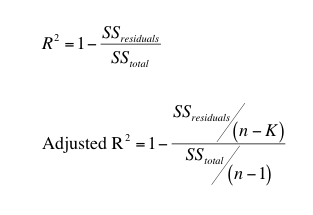

**Further Reading:-**

https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/

**Interpretation of R-squared/Adjusted R-squared**

R-squared measures the goodness of fit of a regression model. Hence, a higher R-squared indicates the model is a good fit while a lower R-squared indicates the model is not a good fit. 

**Is a high R-squared good?**

If the training set’s R-squared is higher and the R-squared of the validation set is much lower, it indicates overfitting. If the same high R-squared translates to the validation set as well, then we can say that the model is a good fit.
**Is a low R-squared bad?**

This completely depends on the type of the problem being solved. In some problems which are hard to model, even an R-squared of 0.5 may be considered a good one. There is no rule of thumb to confirm the R-squared to be good or bad. However, a very low R-squared indicates underfitting and adding additional relevant features or using a complex model might help.

In [ ]:
# R-squared

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

X = load_boston()['data'].copy()
y = load_boston()['target'].copy()

linear_regression = LinearRegression()
linear_regression.fit(X,y)

prediction = linear_regression.predict(X)

def my_r2_score(y_true, y_hat):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    scikit_r2 = r2_score(y_true, y_hat)
    
    print(f'R-squared (SS_explained / SS_Total) = {ss_explained / ss_total}\n' + \
          f'R-squared (1 - (SS_residual / SS_Total)) = {1 - (ss_residual / ss_total)}\n'+ \
          f"Scikit-Learn's R-squared = {scikit_r2}")

print('Positive R-squared\n')
my_r2_score(y, prediction)

print('\n\nNegative R-squared\n')
my_r2_score(y, np.zeros(len(y)))

Positive R-squared

R-squared (SS_explained / SS_Total) = 0.7406426641094114
R-squared (1 - (SS_residual / SS_Total)) = 0.7406426641094095
Scikit-Learn's R-squared = 0.7406426641094095


Negative R-squared

R-squared (SS_explained / SS_Total) = 6.01433345492424
R-squared (1 - (SS_residual / SS_Total)) = -6.0143334549242375
Scikit-Learn's R-squared = -6.0143334549242375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Adjusted R-squared

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_regression

df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
df['y'] = load_boston()['target']

df['RAD'] = df['RAD'].astype('int')
df['CHAS'] = df['CHAS'].astype('int')

X = df.drop(columns='y').copy()
y = df['y'].copy()

np.random.seed(11)
X['random1'] = np.random.randn(len(X))
X['random2'] = np.random.randint(len(X))
X['random3'] = np.random.normal(len(X))

mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

LSTAT      0.667868
RM         0.528050
INDUS      0.466544
NOX        0.465254
PTRATIO    0.434514
TAX        0.361041
CRIM       0.341827
AGE        0.309333
DIS        0.300009
RAD        0.210613
ZN         0.198132
B          0.159204
CHAS       0.020946
random1    0.000000
random2    0.000000
random3    0.000000
dtype: float64

In [ ]:
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y)
    
    prediction = linear_regression.predict(X_new)
    r2 = r2_score(y_true=y, y_pred=prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

,r2,adj_r2
1,0.150780,0.149096
2,0.233988,0.230943
3,0.293714,0.289493
4,0.329528,0.324175
5,0.331313,0.324626
6,0.587377,0.582416
7,0.589490,0.583720
8,0.631149,0.625212
9,0.631948,0.625269
10,0.639663,0.632383
